In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import unicodedata
import re
import seaborn as sns
import acquire

from env import user, password, host

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


In [3]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

# Do your work for this exercise in a file named explore.

--------

# 1.) Spam Data

### a.) Load the spam data set.



In [4]:
df = pd.read_csv('./spam_clean.csv')

### Clean the data

In [5]:
def clean(string):
    'A simple function to cleanup text data'
    #lemmatize text
    wnl = nltk.stem.WordNetLemmatizer()
    #stating what stopwords are
    stopwords = nltk.corpus.stopwords.words('english') 
    #normlalizing string, encoding it to ascii for removal of nonascii,
    #then decoding to change byte object back to string
    string = (unicodedata.normalize('NFKD', string)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    #splitting the string into individual words
    words = re.sub(r'[^\w\s]', '', string).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [6]:
def show_counts_and_ratios(df, column):
    """
    Takes in a dataframe and a string of a single column
    Returns a dataframe with absolute value counts and percentage value counts
    """
    labels = pd.concat([df[column].value_counts(),
                    df[column].value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    labels
    return labels

show_counts_and_ratios(df, "label")

,n,percent
ham,4825,0.865937
spam,747,0.134063


In [7]:
#creating lists which have ham, spam, and one which ontains all the words

In [8]:
ham_words = clean(' '.join(df[df.label =='ham'].text))
ham_words[:10]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la']

In [9]:
type(ham_words)

list

In [10]:
ham_words_string = ' '.join(ham_words)

In [11]:
type(ham_words_string)

str

In [12]:
spam_words = clean(' '.join(df[df.label == 'spam'].text))
spam_words[:10]

['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts']

In [13]:
spam_words_string = ' '.join(spam_words)

In [14]:
all_words = clean(' '.join(df.text))
all_words[:10]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la']

In [15]:
all_word_string = ' '.join(all_words)

----

### look at the frequency of the words

In [16]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq= pd.Series(all_words).value_counts()

-----

### need to combine into a dataframe which can be utilized

In [17]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))


----

### b.) Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?


In [18]:
ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                      .value_counts()
                      .head(10))

ham_bigrams.head()

(call, later)    52
(ill, call)      48
(let, know)      41
(sorry, ill)     39
(r, u)           37
dtype: int64

<AxesSubplot:>

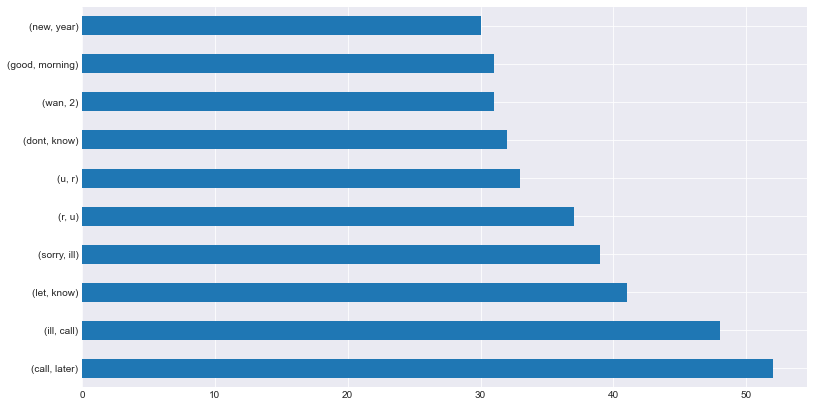

In [19]:
ham_bigrams.plot.barh()

In [20]:
spam_bigrams = (pd.Series(nltk.ngrams(spam_words, 2))
                      .value_counts()
                      .head(10))

spam_bigrams.head()

(please, call)         44
(customer, service)    27
(contact, u)           24
(po, box)              24
(guaranteed, call)     23
dtype: int64

In [21]:
type(spam_bigrams)

pandas.core.series.Series

<AxesSubplot:>

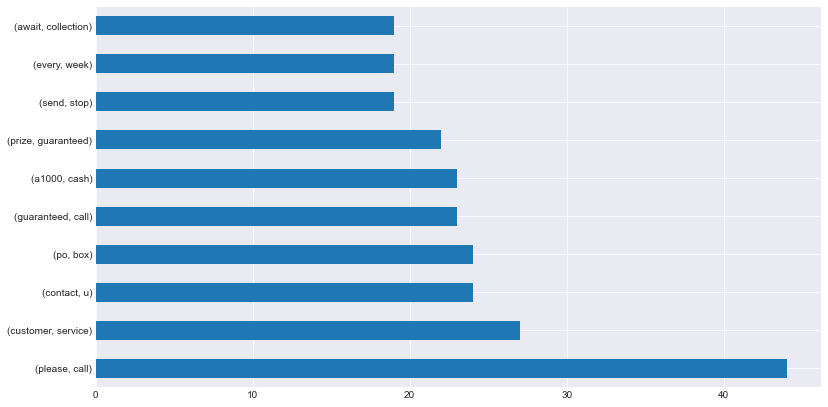

In [22]:
spam_bigrams.plot.barh()

In [23]:
type(spam_words)

list

### Word Cloud Ham

(-0.5, 799.5, 599.5, -0.5)

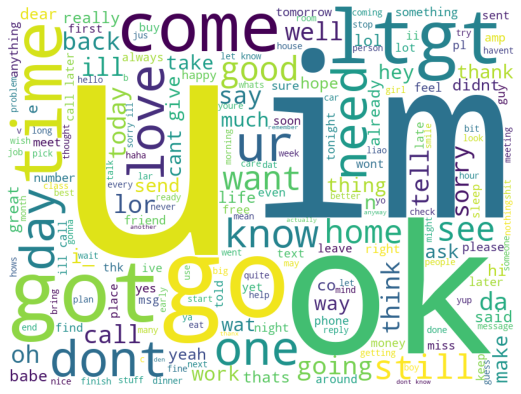

In [24]:
from wordcloud import WordCloud

img = WordCloud(background_color='white', width=800, height=600).generate(ham_words_string)
plt.imshow(img)
plt.axis('off')

### Word Cloud Spam

(-0.5, 799.5, 599.5, -0.5)

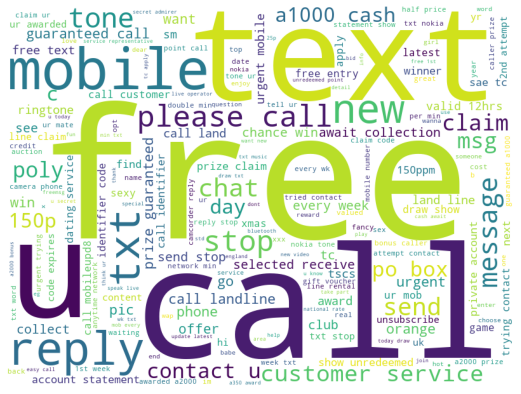

In [25]:
from wordcloud import WordCloud

img = WordCloud(background_color='white', width=800, height=600).generate(spam_words_string)
plt.imshow(img)
plt.axis('off')

### c.) Is there any overlap in the bigrams for the spam data and the ham data?


In [26]:
spam_words_ser = pd.Series(spam_words)
ham_words_ser = pd.Series(ham_words)

In [27]:
results = ham_words_ser.isin(spam_words_ser)
results

0         True
1        False
2         True
3         True
4         True
         ...  
39821     True
39822     True
39823    False
39824     True
39825     True
Length: 39826, dtype: bool

In [28]:
#yes there is overlap between the spam and ham data


In [29]:
#898 words is common between the bigrams
count = ham_words_ser[ham_words_ser.isin(spam_words_ser)].nunique()
count

898

### d.) Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [30]:
spam_trigrams = (pd.Series(nltk.ngrams(spam_words, 3))
                      .value_counts()
                      .head(10))

spam_trigrams.head()

(prize, guaranteed, call)     21
(call, customer, service)     15
(reply, call, 08000930705)    14
(land, line, claim)           14
(2003, account, statement)    13
dtype: int64

In [31]:
ham_trigrams = (pd.Series(nltk.ngrams(ham_words, 3))
                      .value_counts()
                      .head(10))

ham_trigrams.head()

(ill, call, later)      42
(sorry, ill, call)      38
(u, wan, 2)             21
(happy, new, year)      19
(pls, send, message)    13
dtype: int64

# 2.) Explore the blog articles using the techniques discussed in the exploration lesson.



In [32]:
df1 = acquire.acquire_codeup_blog()
df1

,title,content,publish_date,blog_image
0,Codeup’s Data Science Career Accelerator is Here!,The rumors are true! The time has arrived. Cod...,"September 30, 2018",None
1,Data Science Myths,By Dimitri Antoniou and Maggie Giust\nData Sci...,"October 31, 2018",None
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...","October 17, 2018",None
3,10 Tips to Crush It at the SA Tech Job Fair,SA Tech Job Fair\nThe third bi-annual San Anto...,"August 14, 2018",None
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,"August 14, 2018",None


In [33]:
title_words = clean(' '.join((df1.title)))
content_words = clean( ' '.join((df1.content)))

In [138]:
title_words

['codeups',
 'data',
 'science',
 'career',
 'accelerator',
 'data',
 'science',
 'myth',
 'data',
 'science',
 'v',
 'data',
 'analytics',
 'whats',
 'difference',
 '10',
 'tip',
 'crush',
 'sa',
 'tech',
 'job',
 'fair',
 'competitor',
 'bootcamps',
 'closing',
 'model',
 'danger']

In [34]:
title_freq = pd.Series(title_words).value_counts()
content_freq = pd.Series(content_words).value_counts()

In [35]:
blog_word_counts = (pd.concat([title_freq, content_freq], axis=1, sort=True)
                .set_axis(['title', 'content'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

blog_word_counts.head(10)

,title,content
1,0,3
10,1,3
10th,0,1
11,0,1
12,0,1
13,0,2
14,0,2
15,0,1
18,0,1
18th,0,1


In [36]:
title_bigrams = (pd.Series(nltk.ngrams(title_words, 2))
                      .value_counts()
                      .head(10))

title_bigrams.head()

(data, science)        3
(tip, crush)           1
(job, fair)            1
(sa, tech)             1
(accelerator, data)    1
dtype: int64

<AxesSubplot:>

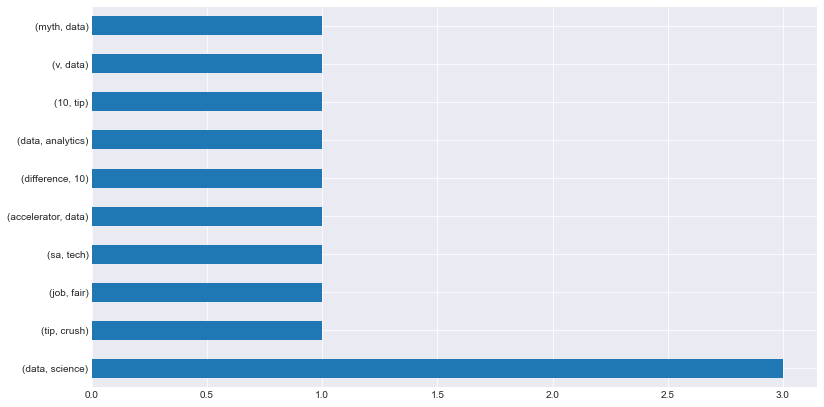

In [37]:
title_bigrams.plot.barh()

In [38]:
content_bigrams = (pd.Series(nltk.ngrams(content_words, 2))
                      .value_counts()
                      .head(10))

content_bigrams.head()

(data, science)        26
(machine, learning)    14
(data, scientist)      13
(job, fair)             9
(via, giphy)            5
dtype: int64

In [39]:
type(content_bigrams)

pandas.core.series.Series

<AxesSubplot:>

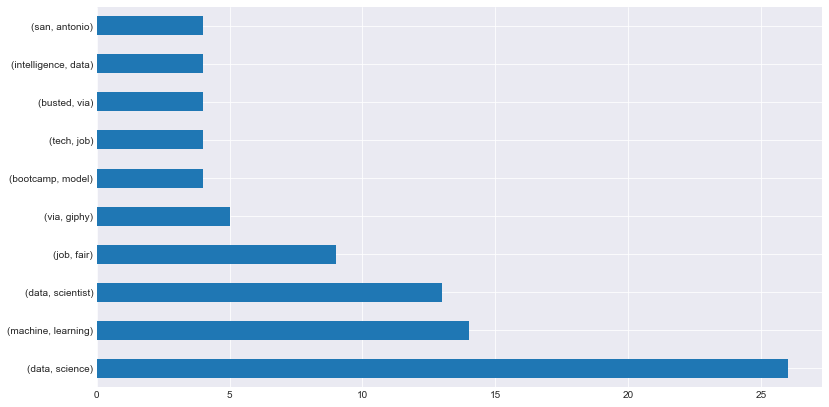

In [40]:
content_bigrams.plot.barh()

In [41]:
title_word_str = ' '.join(title_words)
content_word_str = ' '.join(content_words)

In [ ]:
def bigram_charts(content, n):
    content_word_str = ' '.join(content)
    bigrams = (pd.Series(nltk.ngrams(content_word_str, n)).value_counts().head(10))



### Word Cloud Content

(-0.5, 799.5, 599.5, -0.5)

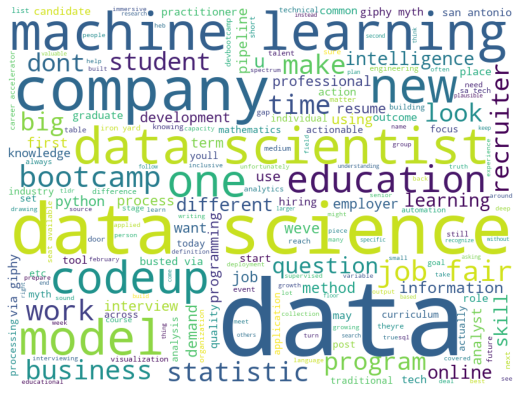

In [42]:
from wordcloud import WordCloud

img = WordCloud(background_color='white', width=800, height=600).generate(content_word_str)
plt.imshow(img)
plt.axis('off')

### Word Cloud Title

(-0.5, 799.5, 599.5, -0.5)

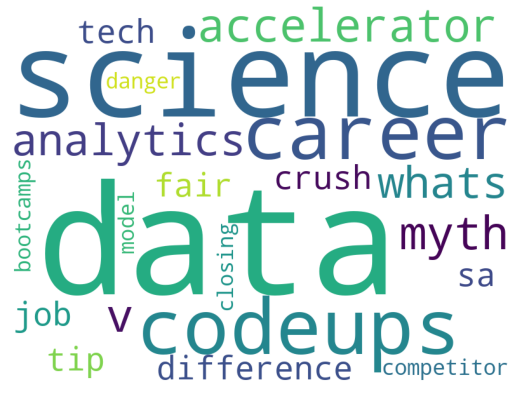

In [43]:
from wordcloud import WordCloud

img = WordCloud(background_color='white', width=800, height=600).generate(title_word_str)
plt.imshow(img)
plt.axis('off')

# 3.)Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [44]:
categories = ['business', 'sports', 'technology', 'entertainment']
df2 = acquire.get_all_news_articles(categories)

/Users/robert_murphy/codeup-data-science/natural-language-processing-exercises/acquire.py:56: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 56 of the file /Users/robert_murphy/codeup-data-science/natural-language-processing-exercises/acquire.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)


In [45]:
def clean(string):
    'A simple function to cleanup text data'
    #lemmatize text
    wnl = nltk.stem.WordNetLemmatizer()
    #stating what stopwords are
    stopwords = nltk.corpus.stopwords.words('english') 
    #normlalizing string, encoding it to ascii for removal of nonascii,
    #then decoding to change byte object back to string
    string = (unicodedata.normalize('NFKD', string)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    #splitting the string into individual words
    words = re.sub(r'[^\w\s]', '', string).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [46]:
df2.head()

,title,content,category
0,Customers of banks under moratorium to get ₹5 ...,Finance Minister Nirmala Sitharaman announced ...,business
1,"₹3 lakh fine on Shilpa, Raj & his firm by SEBI...",Securities and Exchange Board of India (SEBI) ...,business
2,This information isn't collected by govt: FM o...,"Finance Minister Nirmala Sitharaman replied ""t...",business
3,Old video of people laughing as Bezos talks ab...,An old video of Amazon Founder Jeff Bezos has ...,business
4,"Google extends work from home till Oct, mandat...",Google and Alphabet's CEO Sundar Pichai on Wed...,business


In [47]:
df2.category.value_counts()

entertainment    24
technology       24
business         24
sports           23
Name: category, dtype: int64

In [48]:
business_content = clean(' '.join(df2[df2.category == 'business'].content))
entertainment_content = clean(' '.join(df2[df2.category == 'entertainment'].content))
sports_content = clean(' '.join(df2[df2.category == 'sports'].content))
technology_content = clean(' '.join(df2[df2.category == 'technology'].content))

In [49]:
business_content_str = ' '.join(business_content)
entertainment_content_str = ' '.join(entertainment_content)
sports_content_str = ' '.join(sports_content)
technology_content_str = ' '.join(technology_content)

In [50]:
business_title = clean(' '.join(df2[df2.category == 'business'].title))
entertainment_title = clean(' '.join(df2[df2.category == 'entertainment'].title))
sports_title = clean(' '.join(df2[df2.category == 'sports'].title))
technology_title = clean(' '.join(df2[df2.category == 'technology'].title))


In [51]:
business_title_str = ' '.join(business_title)
entertainment_title_str = ' '.join(entertainment_title)
sports_title_str = ' '.join(sports_title)
technology_title_str = ' '.join(technology_title)

--------

In [140]:
def make_string(list_):
    '''
    takes in a list and makes it into strings for use in n-grams and word clouds for nlp
    '''
    _str = ' '.join(list_)
    
    return _str

In [142]:
business_string = make_string(business_title)
type(business_string)

str

In [52]:
business_title_freq = pd.Series(business_title_str.split()).value_counts()
entertainment_title_freq = pd.Series(entertainment_title_str.split()).value_counts()
sports_title_freq = pd.Series(sports_title_str.split()).value_counts()
technology_title_freq = pd.Series(technology_title_str.split()).value_counts()

In [53]:
business_content_freq = pd.Series(business_content_str.split()).value_counts()
entertainment_content_freq = pd.Series(entertainment_content_str.split()).value_counts()
sports_content_freq = pd.Series(sports_content_str.split()).value_counts()
technology_content_freq = pd.Series(technology_content_str.split()).value_counts()

----

In [54]:
title_word_counts = pd.concat([business_title_freq, entertainment_title_freq, sports_title_freq, technology_title_freq], axis=1).fillna(0).astype(int)
title_word_counts.columns = ['business', 'entertainment', 'sports', 'technology']
title_word_counts.head()

,business,entertainment,sports,technology
bank,4,0,0,1
govt,4,0,0,1
lakh,3,1,0,0
crore,3,0,0,0
day,3,0,0,1


In [55]:
content_word_counts = pd.concat([business_content_freq, entertainment_content_freq, sports_content_freq, technology_content_freq], axis=1).fillna(0).astype(int)
content_word_counts.columns = ['business', 'entertainment', 'sports', 'technology']
content_word_counts.head()

,business,entertainment,sports,technology
said,23,25,4,14
crore,16,0,0,0
bank,13,0,0,2
company,10,2,0,4
india,9,1,13,1


------

## Bigrams Exploration

In [56]:
business_content_bigrams = (pd.Series(nltk.ngrams(business_content, 2))
                      .value_counts()
                      .head(10))

business_content_bigrams.head()

(offer, sale)          3
(minister, nirmala)    3
(minister, state)      3
(finance, minister)    3
(trading, volume)      3
dtype: int64

<AxesSubplot:>

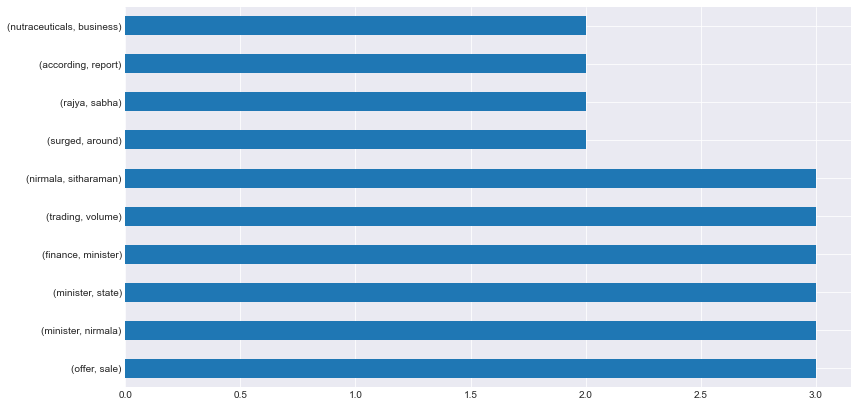

In [57]:
business_content_bigrams.plot.barh()

In [58]:
entertainment_content_bigrams = (pd.Series(nltk.ngrams(entertainment_content, 2))
                      .value_counts()
                      .head(10))

entertainment_content_bigrams.head()

(raj, kundra)          3
(upcoming, film)       2
(hopeless, dreamer)    2
(vishal, bhardwaj)     2
(bell, bottom)         2
dtype: int64

<AxesSubplot:>

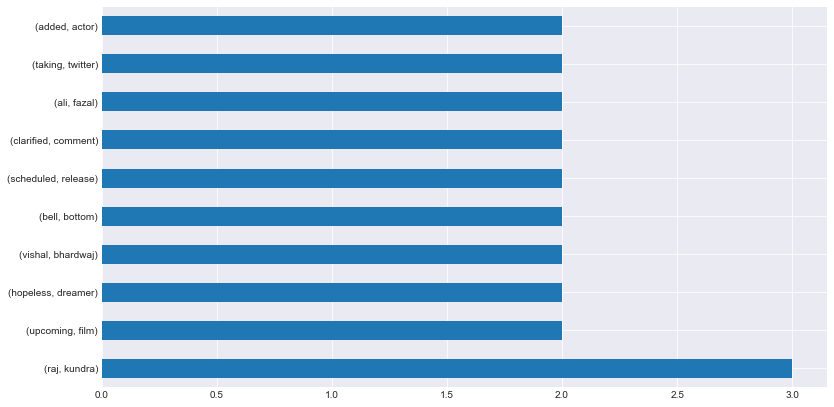

In [59]:
entertainment_content_bigrams.plot.barh()

In [60]:
sports_content_bigrams = (pd.Series(nltk.ngrams(sports_content, 2))
                      .value_counts()
                      .head(10))

sports_content_bigrams.head()

(tokyo, olympics)    14
(round, 32)           8
(indian, archer)      7
(world, number)       6
(event, tokyo)        6
dtype: int64

<AxesSubplot:>

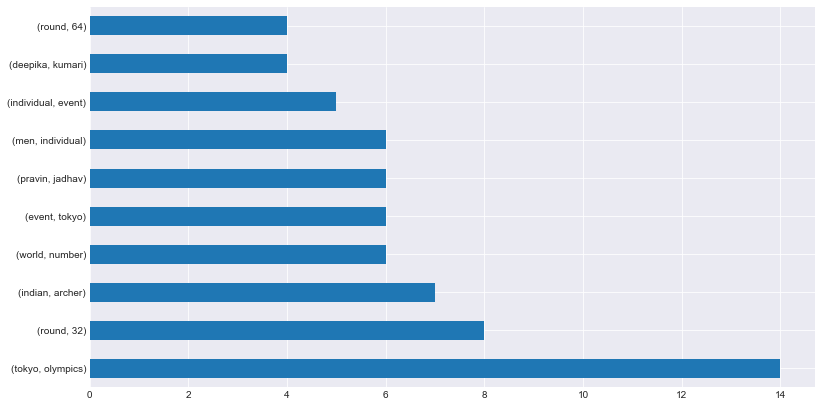

In [61]:
sports_content_bigrams.plot.barh()

In [62]:
technology_content_bigrams = (pd.Series(nltk.ngrams(technology_content, 2))
                      .value_counts()
                      .head(10))

technology_content_bigrams.head()

(high, court)          4
(trading, volume)      3
(market, value)        3
(digital, currency)    2
(also, said)           2
dtype: int64

<AxesSubplot:>

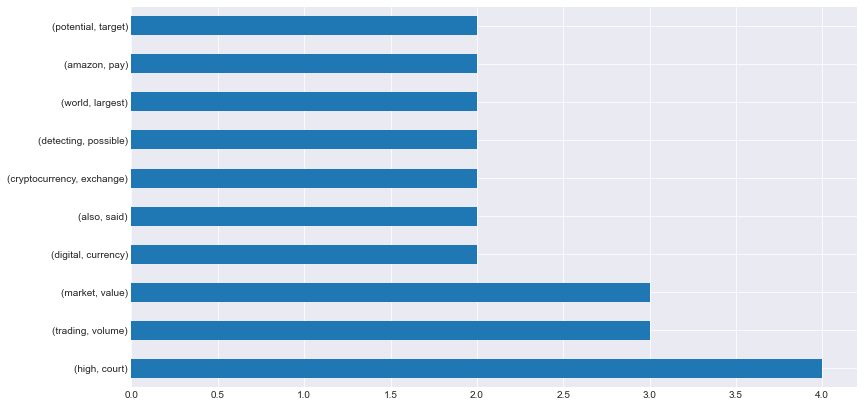

In [63]:
technology_content_bigrams.plot.barh()

-----

In [64]:
business_title_bigrams = (pd.Series(nltk.ngrams(business_title, 2))
                      .value_counts()
                      .head(10))

business_title_bigrams.head()

(spacs, india)    1
(2021, report)    1
(lakh, fine)      1
(ahead, ipo)      1
(imposes, 5)      1
dtype: int64

<AxesSubplot:>

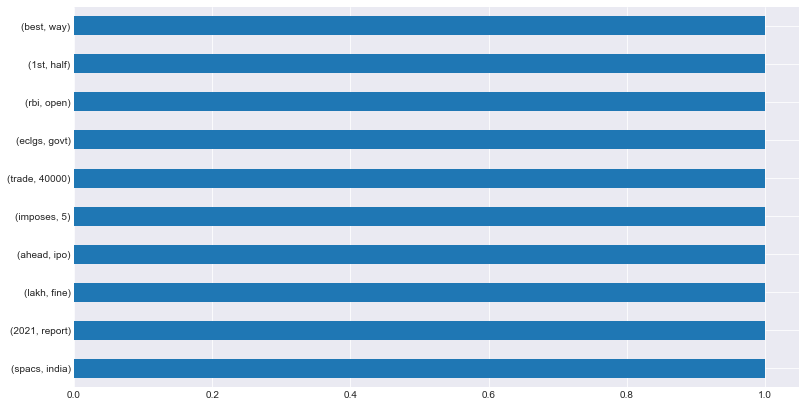

In [65]:
business_title_bigrams.plot.barh()

In [66]:
entertainment_title_bigrams = (pd.Series(nltk.ngrams(entertainment_title, 2))
                      .value_counts()
                      .head(10))

entertainment_title_bigrams.head()

(15, yr)             2
(release, diwali)    1
(ethnicity, play)    1
(mental, health)     1
(sahil, mental)      1
dtype: int64

<AxesSubplot:>

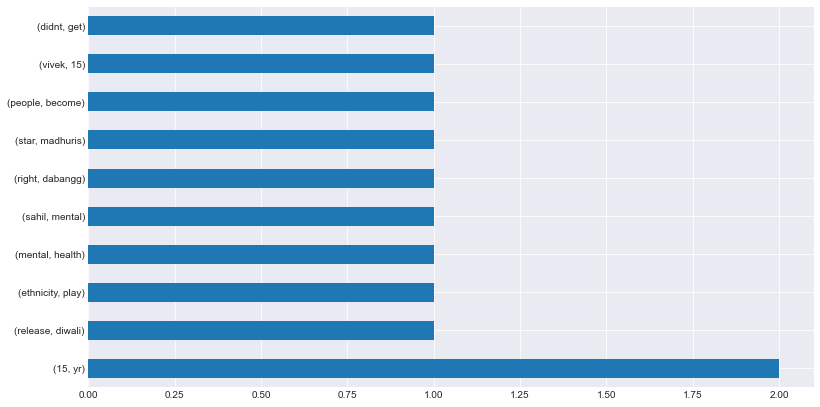

In [67]:
entertainment_title_bigrams.plot.barh()

In [68]:
sports_title_bigrams = (pd.Series(nltk.ngrams(sports_title, 2))
                      .value_counts()
                      .head(10))

sports_title_bigrams.head()

(tokyo, olympics)    7
(round, 32)          5
(indian, archer)     4
(reach, round)       3
(round, 16)          2
dtype: int64

<AxesSubplot:>

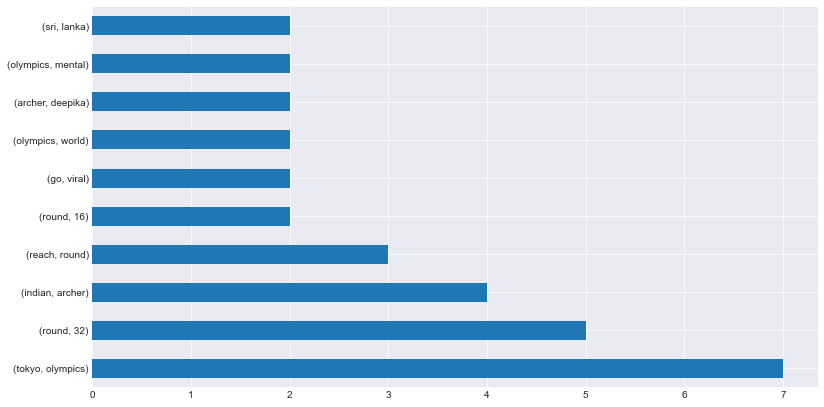

In [69]:
sports_title_bigrams.plot.barh()

In [70]:
technology_title_bigrams = (pd.Series(nltk.ngrams(technology_title, 2))
                      .value_counts()
                      .head(10))

technology_title_bigrams.head()

(ive, much)            1
(mn, time)             1
(trade, 40000)         1
(oct, central)         1
(assange, stripped)    1
dtype: int64

<AxesSubplot:>

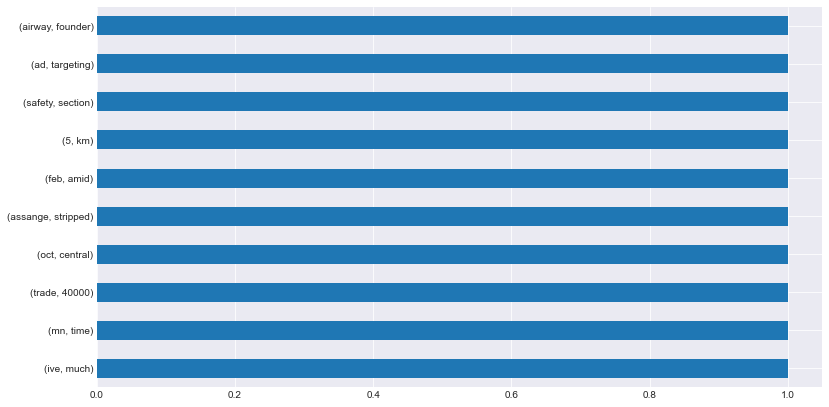

In [71]:
technology_title_bigrams.plot.barh()

-----

### Trigrams

----

In [88]:
business_content_trigrams = (pd.Series(nltk.ngrams(business_content, 3))
                      .value_counts()
                      .head(10))

business_content_trigrams.head()

(minister, nirmala, sitharaman)    3
(finance, minister, nirmala)       3
(aviation, vk, singh)              2
(initial, public, offering)        2
(exchange, board, india)           2
dtype: int64

<AxesSubplot:>

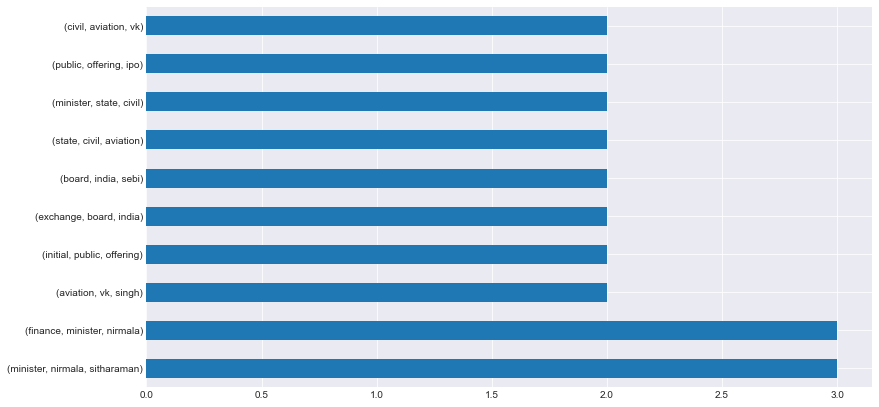

In [89]:
business_content_trigrams.plot.barh()

In [90]:
entertainment_content_trigrams = (pd.Series(nltk.ngrams(entertainment_content, 3))
                      .value_counts()
                      .head(10))

entertainment_content_trigrams.head()

(vishal, bhardwaj, said)              2
(husband, company, delayed)           1
(person, wrote, celebrity)            1
(consideration, naseeruddin, said)    1
(itll, shame, actor)                  1
dtype: int64

<AxesSubplot:>

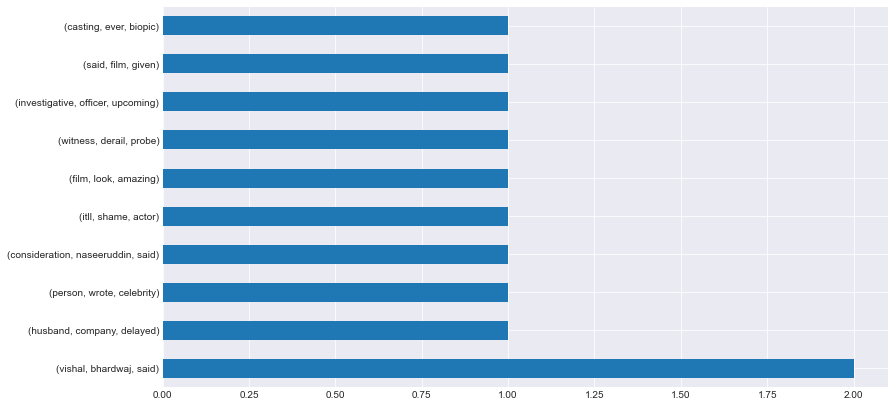

In [91]:
entertainment_content_trigrams.plot.barh()

In [92]:
sports_content_trigrams = (pd.Series(nltk.ngrams(sports_content, 3))
                      .value_counts()
                      .head(10))

sports_content_trigrams.head()

(event, tokyo, olympics)       6
(men, individual, event)       4
(individual, event, tokyo)     4
(indian, archer, tarundeep)    4
(60, round, 64)                3
dtype: int64

<AxesSubplot:>

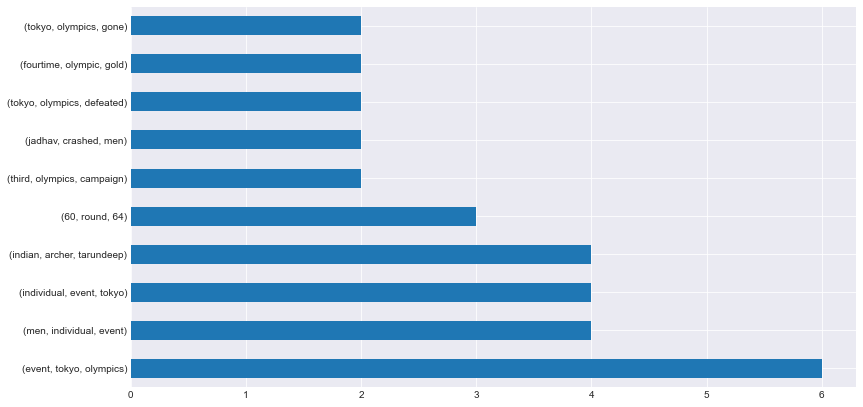

In [93]:
sports_content_trigrams.plot.barh()

In [94]:
technology_content_trigrams = (pd.Series(nltk.ngrams(technology_content, 3))
                      .value_counts()
                      .head(10))

technology_content_trigrams.head()

(delhi, high, court)            2
(billion, market, value)        2
(noncompliance, rule, delhi)    1
(keep, archived, chat)          1
(said, anyone, coming)          1
dtype: int64

<AxesSubplot:>

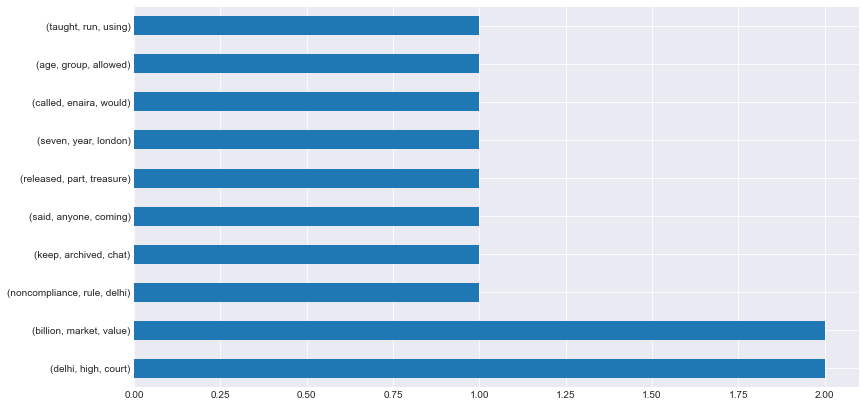

In [95]:
technology_content_trigrams.plot.barh()

-----

In [96]:
business_title_trigrams = (pd.Series(nltk.ngrams(business_title, 3))
                      .value_counts()
                      .head(10))

business_title_trigrams.head()

(field, sale, executive)                1
(august, 2021, rbi)                     1
(best, way, go)                         1
(sebi, violating, insider)              1
(billionaire, jhunjhunwala, bitcoin)    1
dtype: int64

<AxesSubplot:>

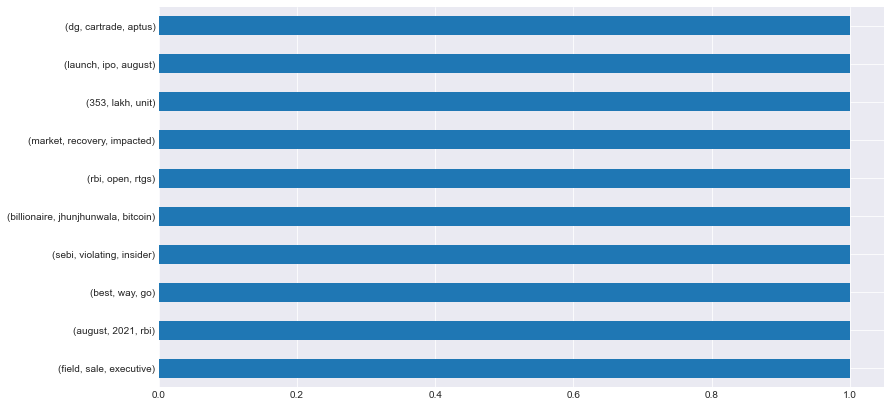

In [97]:
business_title_trigrams.plot.barh()

In [98]:
entertainment_title_trigrams = (pd.Series(nltk.ngrams(entertainment_title, 3))
                      .value_counts()
                      .head(10))

entertainment_title_trigrams.head()

(onpoint, talent, akshay)        1
(director, hopeless, dreamer)    1
(role, white, adarsh)            1
(funeral, coverage, whatever)    1
(kiara, advani, asked)           1
dtype: int64

<AxesSubplot:>

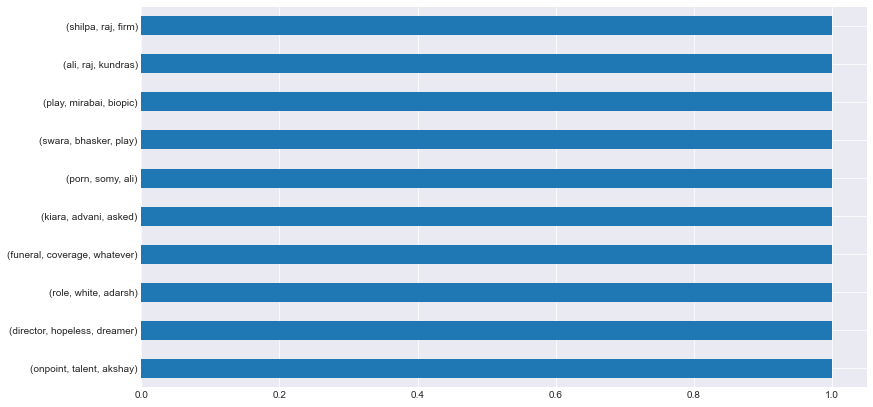

In [99]:
entertainment_title_trigrams.plot.barh()

In [100]:
sports_title_trigrams = (pd.Series(nltk.ngrams(sports_title, 3))
                      .value_counts()
                      .head(10))

sports_title_trigrams.head()

(reach, round, 32)               3
(indian, archer, tarundeep)      2
(olympics, mental, wellbeing)    1
(beat, bhutan, karma)            1
(mental, health, indian)         1
dtype: int64

<AxesSubplot:>

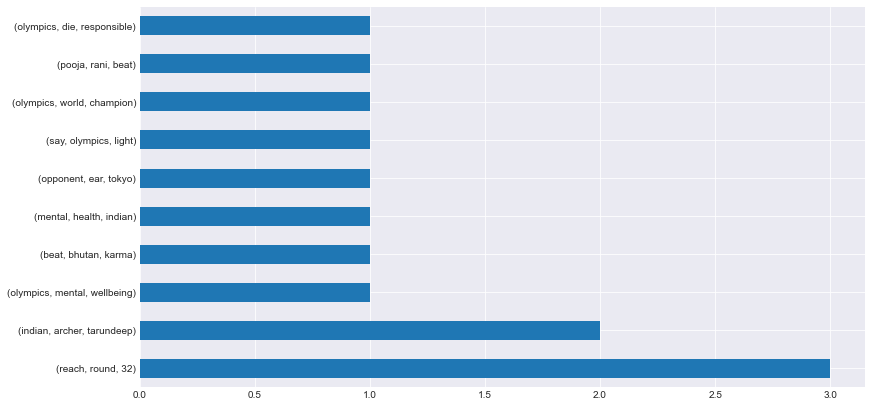

In [101]:
sports_title_trigrams.plot.barh()

In [102]:
technology_title_trigrams = (pd.Series(nltk.ngrams(technology_title, 3))
                      .value_counts()
                      .head(10))

technology_title_trigrams.head()

(home, till, oct)               1
(mcap, amid, discrimination)    1
(reliance, adani, official)     1
(keating, accepts, damage)      1
(beat, bitcoins, 1st)           1
dtype: int64

<AxesSubplot:>

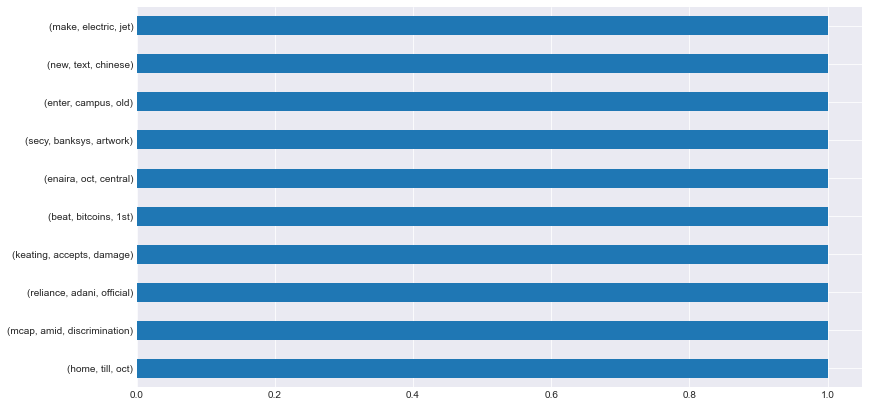

In [103]:
technology_title_trigrams.plot.barh()

-------

### Word Clouds

In [126]:
def word_cloud(word_string, name):
    from wordcloud import WordCloud
    img = WordCloud(background_color='white', width=800, height=600).generate(word_string)
    print('-------------------')
    print(f'{name}')
    print('-------------------')
    plt.imshow(img)
    plt.axis('off')

-------------------
business title
-------------------


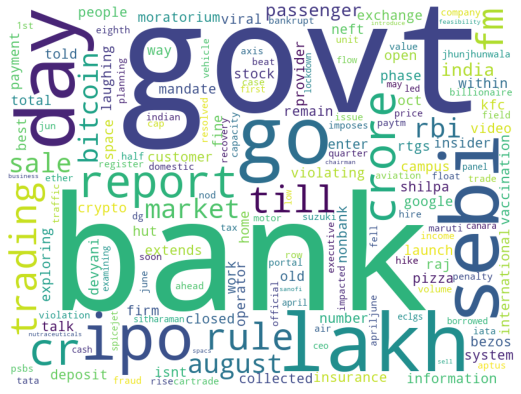

In [129]:
word_cloud(business_title_str, 'business title')

-------------------
sport title
-------------------


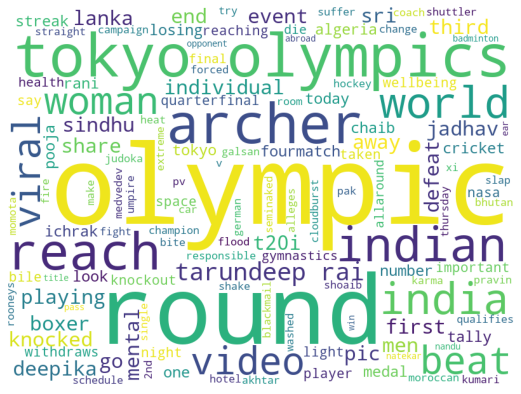

In [130]:
word_cloud(sports_title_str, 'sport title')

-------------------
technology title
-------------------


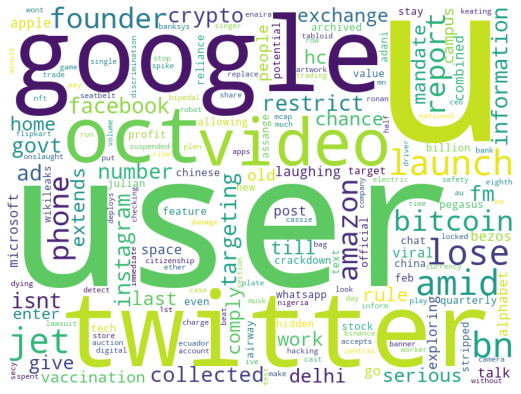

In [131]:
word_cloud(technology_title_str, 'technology title')

-------------------
entertainment title
-------------------


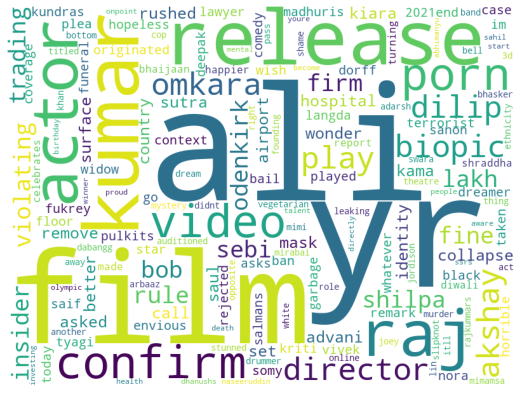

In [132]:
word_cloud(entertainment_title_str, 'entertainment title')

----

Word Cloud Content

------

-------------------
business content
-------------------


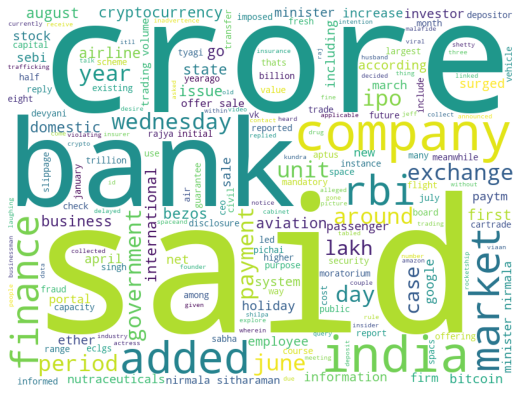

In [133]:
word_cloud(business_content_str, 'business content')

-------------------
entertainment content
-------------------


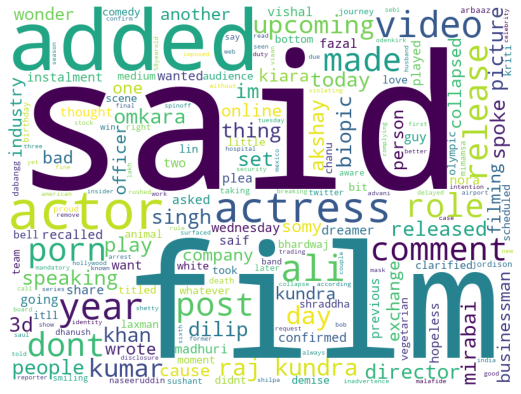

In [134]:
word_cloud(entertainment_content_str, 'entertainment content')

-------------------
sports content
-------------------


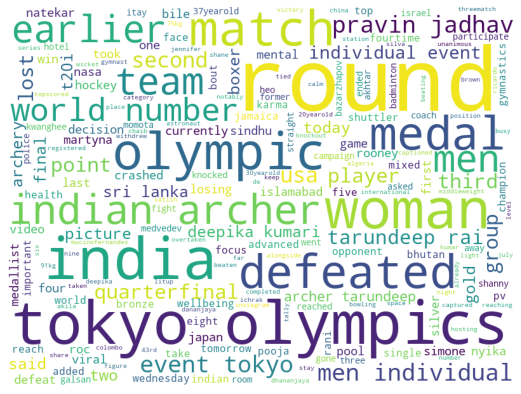

In [135]:
word_cloud(sports_content_str, 'sports content')


-------------------
technology content
-------------------


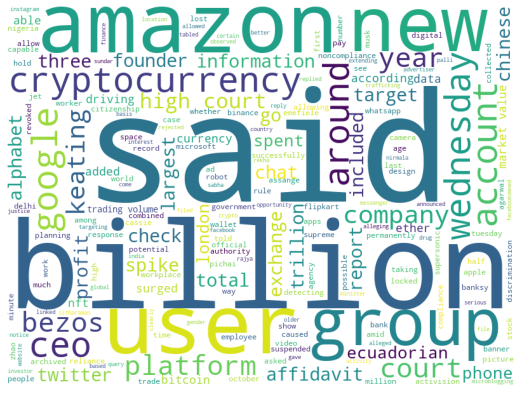

In [136]:

word_cloud(technology_content_str , 'technology content')
